Goals for this lesson:
- learn how to manipulate numpy arrays
- learn how to convert numpy arrays into pandas dataframes and vice e versa
- learn how to perform basic mathematical operations with numpy arrays
- using numpy arrays with scikit

## What is numpy?

From the numpy documentation (https://numpy.org/doc/stable/user/whatisnumpy.html)

>NumPy is the fundamental package for scientific computing in Python. It is a Python library that provides a multidimensional array object, various derived objects (such as masked arrays and matrices), and an assortment of routines for fast operations on arrays, including mathematical, logical, shape manipulation, sorting, selecting, I/O, discrete Fourier transforms, basic linear algebra, basic statistical operations, random simulation and much more.

In brief: Numpy is a library to do maths operations on collections of numbers. The core object type in numpy is a "numpy array" or "ndarray" (N-dimensiosal array). Why do we need these? Remember from day 3, you already learned about a way to store collections of numbers : with a python `list` 

In [2]:
alist = [1,5,10,12,3] 

But list are not meant for doing maths. For example, doing simple things like adding a number to all the elements of the list, multiplying two lists entry by entry, or summing two lists together, does not work out of the box.

In [3]:
alist + 10

TypeError: ignored

In [6]:
alist*alist

TypeError: ignored

In [7]:
alist+alist

[1, 5, 10, 12, 3, 1, 5, 10, 12, 3]

The + operation doesn't error, but this is not interpreted as the "algebric" plus, it is the concatenation of the two lists

To do these mathematical operations with list, you would need to use list comprehension. For example, to add 10 to each element in the list, you can do:

In [83]:
alist_plus_10=[k + 10 for k in alist]
alist_plus_10

[11, 15, 20, 22, 13]

This is not very natural, epecially if you want to do more complex maths like matrix multiplication, transformations, etc... To be able to do maths, we create a numpy array. The easiest way to create an array, is by starting with a list, and making an array from it

In [4]:
import numpy as np
x=np.array(alist)

In [9]:
x

array([ 1,  5, 10, 12,  3])

We can see that m and alist are two different object, by just looking at their type

In [20]:
print(type(x))
print(type(alist))


<class 'numpy.ndarray'>
<class 'list'>


Now let's check out some operations

In [10]:
x+10

array([11, 15, 20, 22, 13])

In [11]:
x+x

array([ 2, 10, 20, 24,  6])

In [12]:
x*x

array([  1,  25, 100, 144,   9])

We can get the dimension of the arrays with `.shape`

In [13]:
x.shape

(5,)

We can get specific elements within the array with an indexing or slicing operation.

In [14]:
x[1] # retrieves one element (first element at 0)

5

In [15]:
x[-1] # - sign counts from the end, so -1 is last


3

In [16]:
x[1:3] # element 1 (second from the left!) up to NOT including element 3 (4th from the left)

array([ 5, 10])

We can convert the array back to a list with

In [21]:
list(x)

[1, 5, 10, 12, 3]

The array x is one-dimensional, but we can also make 2D arrays. Just like we can make a 1-D array from a list, we can make a 2D array from a list of list

In [5]:
M=np.array([[1,3,5],[-1,10,6]])
M

array([[ 1,  3,  5],
       [-1, 10,  6]])

In [18]:
M.shape

(2, 3)

Slicing works on 2D arrays as well


In [19]:
M[1,:] # second row, all columns

array([-1, 10,  6])

In [52]:
M[:,2] #  

array([5, 6])

In [20]:
M[1,1:-1]

array([10])

We can use arrays to do matrix operations. For example, let's multiply the matrix M with the vector v. 

In [29]:
v=np.array([1,1,0])
M @ v

array([4, 9])

Note that we used the operator @ for matrix multiplication, which is not the same as * which is element wise multiplication

In [30]:
M *v 

array([[ 1,  3,  0],
       [-1, 10,  0]])

## Reshaping, stacking, transposing

We can reshape the array with .reshape

In [32]:
M

array([[ 1,  3,  5],
       [-1, 10,  6]])

For example, let's reshape the 2x3 matrix into a 3x2 matrix.

In [35]:
np.reshape(M,(3,2))

array([[ 1,  3],
       [ 5, -1],
       [10,  6]])

Note that the new matrix is created by reading the elements of the input matrix rows first (left to right then top to bottom) and filling in the new matrix row first (left to right then top to bottom). 

Exercice: reshape the matrix M into a single row matrix, and then into a single column 

In [40]:
np.reshape(M,(1,6))

array([[ 1,  3,  5, -1, 10,  6]])

We can also convert from 2D matrix to 1D with `.flatten`

In [84]:
M.flatten()

array([ 1,  3,  5, -1, 10,  6])

Exercise: is this numpy array different than the one obtained in the previous exercise (single row matrix)

We combine numpy arrays together by using horizontal stacking (hstack) or vertical stacking (vstack)

In [6]:
np.hstack([M,M])

array([[ 1,  3,  5,  1,  3,  5],
       [-1, 10,  6, -1, 10,  6]])

In [7]:
np.vstack([M,M])

array([[ 1,  3,  5],
       [-1, 10,  6],
       [ 1,  3,  5],
       [-1, 10,  6]])

We can transpose a numpy array with `.transpose`


In [87]:
M.transpose()

array([[ 1, -1],
       [ 3, 10],
       [ 5,  6]])

## From numpy to Pandas 

A numpy array can be used to create a DataFrame

In [9]:
import pandas as pd

In [10]:
pd.DataFrame(M)

,0,1,2
0,1,3,5
1,-1,10,6


We can specify the name for the columns and rowns

In [13]:
M_df=pd.DataFrame(M, index=['day0','day1'], columns=['Seattle','Denver','Winnipeg'])
M_df

,Seattle,Denver,Winnipeg
day0,1,3,5
day1,-1,10,6


Under the hood, Pandas uses numpy arrays. We can get the numpy array used to store the values in pandas with `.values`

In [16]:
M_df.values

array([[ 1,  3,  5],
       [-1, 10,  6]])

You can see that these are two different objects by looking at their type

In [17]:
type(M_df)

pandas.core.frame.DataFrame

In [18]:
type(M_df.values)

numpy.ndarray

## Simple operations on arrays: mean, sum, standard devitions, etc..

Just like what we saw with Pandas, we can compute sum, means, etc... along a specific axis

In [22]:
M.sum(axis=1) # sum of all elements along the columns

array([ 9, 15])

In [88]:
M.mean(axis=1) # mean of all elements along the columns

array([3., 5.])

In [89]:
M.std(axis=0) # standard deviation along the rows

array([1. , 3.5, 0.5])

**EXERCISE** : Recall the defition of the standard deviation: $std(v)=\sqrt{(\text{mean}(v^2)-\text{mean}(v)^2)}$. Using this definition, recover the standard deviation of M along the rows without using the function `.std`

In [31]:
#mean M (along the rows, so axis=0)
mu=M.mean(axis=0)
print(mu)
mu2=(M*M).mean(axis=0)
print(mu2)
np.sqrt(mu2-mu**2)

[0.  6.5 5.5]
[ 1.  54.5 30.5]


array([1. , 3.5, 0.5])

Common mathematical functions are in numpy: `np.sin, np.tan, np.exp, np.sqrt, etc...` 

In [34]:
np.cos(np.pi)

-1.0

## Loading real world data in a numpy array

Let's download a single-cell RNA sequencing dataset from http://dropviz.org/. 


In [136]:
!wget https://storage.googleapis.com/dropviz-downloads/static/metacells.BrainCellAtlas_Saunders_version_2018.04.01.csv 

--2021-06-14 01:12:54--  https://storage.googleapis.com/dropviz-downloads/static/metacells.BrainCellAtlas_Saunders_version_2018.04.01.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.164.176, 172.217.2.112, 172.253.62.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.164.176|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 41785397 (40M) [text/csv]
Saving to: ‘metacells.BrainCellAtlas_Saunders_version_2018.04.01.csv.1’

metacells.BrainCell 100%[===================>]  39.85M   103MB/s    in 0.4s    

2021-06-14 01:12:54 (103 MB/s) - ‘metacells.BrainCellAtlas_Saunders_version_2018.04.01.csv.1’ saved [41785397/41785397]



We can take a quick look at the csv file by running the shell command `head` direcly from within the notebook


In [142]:
!head metacells.BrainCellAtlas_Saunders_version_2018.04.01.csv


,CB_1-1,CB_10-1,CB_10-2,CB_10-3,CB_11-1,CB_11-2,CB_11-3,CB_11-4,CB_11-5,CB_2-1,CB_3-1,CB_3-2,CB_3-3,CB_3-4,CB_4-1,CB_4-2,CB_4-3,CB_5-1,CB_6-1,CB_6-2,CB_6-3,CB_7-1,CB_8-1,CB_8-2,CB_9-1,FC_1-1,FC_1-10,FC_1-11,FC_1-2,FC_1-3,FC_1-4,FC_1-5,FC_1-6,FC_1-7,FC_1-8,FC_1-9,FC_10-1,FC_10-2,FC_10-3,FC_10-4,FC_10-5,FC_10-6,FC_11-1,FC_11-2,FC_11-3,FC_11-4,FC_12-1,FC_12-2,FC_12-3,FC_12-4,FC_12-5,FC_13-1,FC_13-2,FC_13-3,FC_13-4,FC_14-1,FC_14-2,FC_14-3,FC_14-4,FC_14-5,FC_2-1,FC_2-10,FC_2-2,FC_2-3,FC_2-4,FC_2-5,FC_2-6,FC_2-7,FC_2-8,FC_2-9,FC_3-1,FC_3-10,FC_3-11,FC_3-12,FC_3-13,FC_3-2,FC_3-3,FC_3-4,FC_3-5,FC_3-6,FC_3-7,FC_3-8,FC_3-9,FC_4-1,FC_4-2,FC_5-1,FC_6-1,FC_6-2,FC_6-3,FC_6-4,FC_6-5,FC_6-6,FC_7-1,FC_7-2,FC_7-3,FC_7-4,FC_7-5,FC_7-6,FC_7-7,FC_8-1,FC_8-2,FC_9-1,FC_9-2,FC_9-3,FC_9-4,FC_9-5,PC_1-1,PC_1-2,PC_1-3,PC_1-4,PC_1-5,PC_1-6,PC_1-7,PC_1-8,PC_1-9,PC_10-1,PC_10-2,PC_10-3,PC_10-4,PC_11-1,PC_11-2,PC_11-3,PC_11-4,PC_12-1,PC_12-2,PC_12-3,PC_12-4,PC_13-1,PC_13-2,PC_13-3,PC_13-4,PC_13-5,PC_14-1,PC_14-2,PC_

This is a matrix of number with a row header and a column header. Each row represent a gene, and each column a cell type. The number are the expression level of the gene in the given cell type

The cell types are described in another file


In [143]:
!wget https://storage.googleapis.com/dropviz-downloads/static/annotation.BrainCellAtlas_Saunders_version_2018.04.01.csv

--2021-06-14 01:19:34--  https://storage.googleapis.com/dropviz-downloads/static/annotation.BrainCellAtlas_Saunders_version_2018.04.01.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.73.240, 142.250.73.208, 142.250.65.80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.73.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 54954 (54K) [text/csv]
Saving to: ‘annotation.BrainCellAtlas_Saunders_version_2018.04.01.csv.1’

annotation.BrainCel 100%[===================>]  53.67K  --.-KB/s    in 0s      

2021-06-14 01:19:34 (129 MB/s) - ‘annotation.BrainCellAtlas_Saunders_version_2018.04.01.csv.1’ saved [54954/54954]



In [144]:
!head annotation.BrainCellAtlas_Saunders_version_2018.04.01.csv

,tissue,class,class_marker,type_marker,full_name,common_name,subcluster,tissue_subcluster
1,CB,NEURON,Slc17a7,Gabra6,Neuron.Slc17a7.Gabra6,Granule cells,1-1,CB_1-1
2,CB,ENDOTHELIAL_STALK,Flt1,Mgp,Endothelial_Stalk.Flt1.Mgp,Endothelial_Stalk.Flt1.Mgp,10-1,CB_10-1
3,CB,ENDOTHELIAL_STALK,Flt1,Car4,Endothelial_Stalk.Flt1.Car4,Endothelial_Stalk.Flt1.Car4,10-2,CB_10-2
4,CB,ENDOTHELIAL_STALK,Flt1,Lrg1,Endothelial_Stalk.Flt1.Lrg1,Endothelial_Stalk.Flt1.Lrg1,10-3,CB_10-3
5,CB,ENDOTHELIAL_TIP,Dcn,Nnat,Endothelial_Tip.Dcn.Nnat,Endothelial_Tip.Dcn.Nnat,11-1,CB_11-1
6,CB,ENDOTHELIAL_TIP,Dcn,Apod,Endothelial_Tip.Dcn.Apod,Endothelial_Tip.Dcn.Apod,11-2,CB_11-2
7,CB,MURAL,Acta2Rgs5,Acta2,Mural.Acta2Rgs5.Acta2,Mural.Acta2Rgs5.Acta2,11-3,CB_11-3
8,CB,MURAL,Acta2Rgs5,Kcnj8,Mural.Acta2Rgs5.Kcnj8,Mural.Acta2Rgs5.Kcnj8,11-4,CB_11-4
9,CB,MURAL,Acta2Rgs5,Rgs5,Mural.Acta2Rgs5.Rgs5,Mural.Acta2Rgs5.Rgs5,11-5,CB_11-5


Let's load the dataset in a pandas dataframe

In [36]:
sc_data_df=pd.read_csv("./metacells.BrainCellAtlas_Saunders_version_2018.04.01.csv", header=0, index_col=0)

In [37]:
sc_data_df

,CB_1-1,CB_10-1,CB_10-2,CB_10-3,CB_11-1,CB_11-2,CB_11-3,CB_11-4,CB_11-5,CB_2-1,CB_3-1,CB_3-2,CB_3-3,CB_3-4,CB_4-1,CB_4-2,CB_4-3,CB_5-1,CB_6-1,CB_6-2,CB_6-3,CB_7-1,CB_8-1,CB_8-2,CB_9-1,FC_1-1,FC_1-10,FC_1-11,FC_1-2,FC_1-3,FC_1-4,FC_1-5,FC_1-6,FC_1-7,FC_1-8,FC_1-9,FC_10-1,FC_10-2,FC_10-3,FC_10-4,...,TH_12-2,TH_12-3,TH_12-4,TH_2-1,TH_2-10,TH_2-11,TH_2-2,TH_2-3,TH_2-4,TH_2-5,TH_2-6,TH_2-7,TH_2-8,TH_2-9,TH_3-1,TH_3-10,TH_3-11,TH_3-2,TH_3-3,TH_3-4,TH_3-5,TH_3-6,TH_3-7,TH_3-8,TH_3-9,TH_4-1,TH_4-2,TH_4-3,TH_4-4,TH_5-1,TH_5-2,TH_6-1,TH_6-2,TH_7-1,TH_7-2,TH_8-1,TH_8-2,TH_8-3,TH_8-4,TH_9-1
0610005C13Rik,10,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,6,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,2.0,4.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0
0610007P14Rik,871,7,9,2,2,1,2,1,1,346,33,16,4,7,15,13,3,0,58,10,13,140,3,22,4,66,22,26,50,10,16,33,43,4,3,19,41,14,114,68,...,132.0,31.0,11.0,93.0,528.0,487.0,199.0,91.0,132.0,15.0,110.0,36.0,236.0,39.0,34.0,21.0,6.0,25.0,52.0,28.0,46.0,29.0,20.0,75.0,30.0,102.0,0.0,77.0,19.0,22.0,17.0,6.0,10.0,5.0,5.0,425.0,3245.0,502.0,141.0,8.0
0610009B22Rik,490,2,5,8,8,2,3,0,2,51,42,25,9,8,16,19,7,3,16,11,6,247,2,13,9,77,38,18,35,9,35,34,30,14,5,17,33,18,52,17,...,50.0,38.0,12.0,26.0,158.0,202.0,53.0,40.0,59.0,4.0,23.0,9.0,64.0,6.0,13.0,11.0,3.0,31.0,47.0,21.0,30.0,14.0,24.0,38.0,7.0,97.0,3.0,101.0,25.0,26.0,25.0,4.0,11.0,3.0,5.0,308.0,1365.0,250.0,59.0,9.0
0610009E02Rik,17,5,6,1,0,0,0,1,2,1,4,1,0,0,0,0,0,0,0,0,1,50,1,5,2,6,0,1,4,0,0,1,1,0,0,0,12,6,0,3,...,8.0,2.0,3.0,7.0,13.0,30.0,7.0,4.0,9.0,1.0,0.0,0.0,14.0,2.0,2.0,3.0,0.0,1.0,3.0,0.0,1.0,1.0,0.0,9.0,1.0,80.0,0.0,70.0,8.0,10.0,25.0,0.0,0.0,3.0,2.0,4.0,47.0,23.0,0.0,0.0
0610009L18Rik,75,1,1,1,0,0,3,1,1,10,3,1,2,2,3,0,0,0,3,1,1,69,1,7,7,14,1,0,8,0,2,4,10,1,0,1,8,1,3,1,...,3.0,13.0,5.0,9.0,31.0,33.0,11.0,5.0,5.0,1.0,6.0,2.0,21.0,2.0,6.0,2.0,2.0,2.0,7.0,1.0,7.0,3.0,5.0,7.0,2.0,24.0,0.0,14.0,6.0,67.0,42.0,1.0,2.0,2.0,3.0,88.0,412.0,23.0,28.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Preb,557,4,4,8,0,3,3,1,0,27,30,11,6,2,4,8,3,1,22,7,1,246,3,13,5,88,47,18,61,13,20,30,30,27,11,11,34,20,16,10,...,21.0,36.0,11.0,103.0,760.0,812.0,243.0,123.0,165.0,18.0,126.0,50.0,432.0,36.0,34.0,32.0,10.0,28.0,67.0,32.0,24.0,25.0,41.0,91.0,25.0,135.0,2.0,181.0,52.0,22.0,22.0,9.0,7.0,9.0,9.0,150.0,1096.0,126.0,37.0,3.0
Prelid1,806,14,12,13,6,6,6,3,1,38,25,27,5,6,10,16,6,3,21,5,13,111,3,7,10,86,31,28,56,5,16,38,29,13,7,16,15,19,45,16,...,36.0,14.0,5.0,92.0,543.0,709.0,243.0,123.0,175.0,18.0,87.0,26.0,353.0,38.0,26.0,26.0,6.0,36.0,61.0,41.0,29.0,29.0,47.0,68.0,16.0,161.0,4.0,218.0,53.0,41.0,36.0,7.0,11.0,0.0,4.0,220.0,983.0,112.0,44.0,6.0
Prelid2,0,3,4,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,27,0,0,0,1,0,0,2,0,0,0,5,0,0,0,1,3,0,0,...,0.0,0.0,0.0,0.0,4.0,2.0,0.0,0.0,1.0,0.0,2.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,38.0,1.0,52.0,15.0,4.0,5.0,0.0,0.0,1.0,3.0,1.0,1.0,0.0,0.0,0.0
Prelp,1,0,0,0,17,18,16,4,6,0,0,0,0,0,0,0,0,1,2,0,0,11,4,17,39,0,2,1,1,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,0.0,0.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,3.0,98.0,103.0,164.0,78.0,0.0,1.0,0.0,4.0,1.0,1.0,0.0


First, we should examine the dataset by eye. We notice that some values are NaN. This could lead to numerical issues down the road so right away we replace these NaN by 0.

In [56]:
sc_data_df=sc_data_df.fillna(0)

Now we get the data as a numpy array

In [92]:
sc_data=sc_data_df.values

*Note*: we could also have loaded this dataset directly as a numpy array, but this is a little more tedious because we need to deal with the row and column headers separately.


In [ ]:
sc_data_nopandas=np.loadtxt("./metacells.BrainCellAtlas_Saunders_version_2018.04.01.csv", usecols=range(1,565), skiprows=1, delimiter=",", dtype=int)


Note that we had to skip the first row (column header), and the first column ( row header), so that all the values are of the same type. We could have obtained the number of columns (565) with 

In [58]:
with open("./metacells.BrainCellAtlas_Saunders_version_2018.04.01.csv") as f:
    ncols = len(f.readline().split(','))

## Preprocessing

Usually when we start with raw data, we need to do some preprocessing to get the data ready for analyisis. The removal of the NaN earlier was an example of preprocessing, also called data clean up. Other common preprocessing steps include filtering out features or observations and normalization. Here, let's imagine we are interested in looking only at the top 1000 most abundant genes.  

Let's define the abundance of a gene (also called expression level) as the sum of the mean expression across all cell types. 



In [93]:
expr_total=sc_data.mean(axis=1)
expr_total

array([  0.66017699, 112.63539823,  73.48849558, ...,   2.18230088,
        15.35044248,  18.40707965])

To get the top 1000 genes, we can rank these

In [100]:
rank_ix=np.argsort(expr_total) # rank_ix[i] contains the index of gene ranked i
rank_ix # least abundant gene at position 11632, most abundance at position 17055

array([11632,  9574,  9571, ...,  3372, 14214, 17055])

We verify that the ranking gives us what we want: if we resort the gene expression using the ranking index, we should get the sorted expression values

In [101]:
expr_total[rank_ix]

array([    0.        ,     0.        ,     0.        , ...,
       12800.71327434, 21085.05486726, 25013.47433628])

And we verify this is right by directly sorting the expression

In [103]:
expr_sorted=np.sort(expr_total)
expr_sorted

array([    0.        ,     0.        ,     0.        , ...,
       12800.71327434, 21085.05486726, 25013.47433628])

**EXERCISE**: prove that `expr_total[rank_ix]` and `expr_sorted` contain the same values in the the same order

In [104]:
np.all(expr_sorted==expr_total[rank_ix])

True

In [105]:
#alternative method
np.sum(expr_sorted!=expr_total[rank_ix])

0

This is good but we would want the top genes first rather than last

In [107]:
rank_ix=np.argsort(-expr_total)
expr_total[rank_ix]

array([25013.47433628, 21085.05486726, 12800.71327434, ...,
           0.        ,     0.        ,     0.        ])

**Exercise**: how to get the names of these genes?

In [108]:
sc_data_df.index[rank_ix]


Index(['Plp1', 'Malat1', 'Calm1', 'Ppp3ca', 'Hsp90ab1', 'Meg3', 'Map1b',
       'Atp2b1', 'Camk2n1', 'Fth1',
       ...
       'Mir466k', '2610303G11Rik', 'Ighv9-4', 'Gm25225', 'Igkv20-101-2',
       'Igkv3-1', 'AC122844.1', 'Igkv4-74', 'Ighv2-4', 'Gm38276'],
      dtype='object', length=17406)

In [112]:
### Improved  filtering

The mean expression may very well be dominated by one or a few samples if they are not normalized the same way. Let's check the total number of counts per sample

In [115]:
counts_per_sample=sc_data.sum(axis=0)
counts_per_sample # by eyey, there is at least two order of magnitude differnece in the total counts per sample

array([6.5183960e+06, 8.6448000e+04, 8.9093000e+04, 8.1934000e+04,
       4.0023000e+04, 2.7440000e+04, 4.2408000e+04, 1.5304000e+04,
       1.4740000e+04, 4.7635000e+05, 4.4173400e+05, 2.1362600e+05,
       9.9757000e+04, 8.6048000e+04, 1.1721700e+05, 1.3376000e+05,
       4.4147000e+04, 2.7955000e+04, 2.1182400e+05, 8.2410000e+04,
       2.5673000e+04, 1.3616770e+06, 2.5307000e+04, 1.1583200e+05,
       8.5585000e+04, 1.0553820e+06, 4.6348900e+05, 3.3937300e+05,
       7.4885600e+05, 1.1910800e+05, 2.9668500e+05, 4.5901300e+05,
       4.8403100e+05, 1.8953000e+05, 8.4977000e+04, 1.9401800e+05,
       2.9371400e+05, 1.1789100e+05, 3.4181300e+05, 1.6230800e+05,
       3.4798000e+05, 2.0161900e+05, 3.6484200e+05, 2.3593000e+04,
       1.1788700e+05, 1.2875000e+04, 1.5437730e+06, 1.8482600e+05,
       1.1506860e+06, 1.1472870e+06, 5.4680000e+04, 3.3232300e+05,
       3.1545400e+05, 9.7345000e+04, 6.0906000e+04, 1.1886400e+05,
       9.1421000e+04, 5.7356000e+04, 1.0281100e+05, 2.9454000e

**EXERCISE** Normalize each column (sample) by the total number of counts for this column. This is called "sequencing depth" normalization

In [127]:
sc_data_normalized=sc_data/counts_per_sample *1e6 #1e6 makes the numbers closer to 1
sc_data_normalized

array([[1.53411974e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.33621830e+02, 8.09735332e+01, 1.01018037e+02, ...,
        2.56353690e+02, 1.75457371e+02, 5.53974420e+01],
       [7.51718674e+01, 2.31352952e+01, 5.61211319e+01, ...,
        1.27666181e+02, 7.34183327e+01, 6.23221223e+01],
       ...,
       [0.00000000e+00, 3.47029428e+01, 4.48969055e+01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.53411974e-01, 0.00000000e+00, 0.00000000e+00, ...,
        5.10664722e-01, 1.24437852e+00, 0.00000000e+00],
       [1.10456622e+01, 1.15676476e+01, 1.12242264e+01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

Now we can we can get the top 1000 genes after proper normalization. 


In [118]:
expr_total_normalized=sc_data_normalized.mean(axis=1)
rank_ix_good=np.argsort(-expr_total_normalized)


In [120]:
# what are the genes
sc_data_df.index[rank_ix_good]

Index(['Malat1', 'Plp1', 'Meg3', 'Calm1', 'Hsp90ab1', 'Actb', 'Fth1', 'Map1b',
       'Cst3', 'Gnas',
       ...
       'Olfr353', 'Olfr352', 'Olfr301', 'Olfr272', 'Olfr205', 'Gm10228',
       'Olfr199', 'Gm24072', 'Olfr869', 'Gm15736'],
      dtype='object', length=17406)

In [121]:
# Compare with the earlier result

In [122]:
sc_data_df.index[rank_ix]

Index(['Plp1', 'Malat1', 'Calm1', 'Ppp3ca', 'Hsp90ab1', 'Meg3', 'Map1b',
       'Atp2b1', 'Camk2n1', 'Fth1',
       ...
       'Mir466k', '2610303G11Rik', 'Ighv9-4', 'Gm25225', 'Igkv20-101-2',
       'Igkv3-1', 'AC122844.1', 'Igkv4-74', 'Ighv2-4', 'Gm38276'],
      dtype='object', length=17406)

Finally we are ready to extract a numpy array with the normalized expression of the top 1000 genes

In [128]:
sc_data_normalized_top1000=sc_data_normalized[rank_ix_good[0:1000],:]
sc_data_normalized_top1000

array([[1.08015837e+04, 7.03312974e+03, 5.35395598e+03, ...,
        2.65193297e+04, 1.00296909e+04, 2.70062530e+03],
       [1.51571031e+02, 9.25411808e+01, 7.85695846e+01, ...,
        1.86520290e+05, 1.24654374e+05, 4.60214250e+04],
       [1.69566255e+03, 2.31352952e+01, 7.85695846e+01, ...,
        4.60108915e+02, 1.96611806e+02, 5.12426339e+02],
       ...,
       [3.51006597e+02, 2.77623542e+02, 1.45914943e+02, ...,
        1.32772828e+02, 1.36881637e+02, 9.00208433e+01],
       [4.62537103e+02, 5.78382380e+01, 1.01018037e+02, ...,
        8.73236675e+01, 1.26926609e+02, 1.38493605e+02],
       [1.99435567e+00, 3.22737368e+03, 3.17645606e+03, ...,
        2.55332361e+00, 9.95502816e+00, 6.23221223e+01]])

# PCA

In [129]:
from sklearn import decomposition
from sklearn import preprocessing

In [131]:
X=preprocessing.scale(sc_data.transpose())

In [132]:
pca=decomposition.PCA(2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [133]:
X_transformed=pca.transform(X)

In [134]:
X_transformed.shape

(565, 2)

In [71]:
import matplotlib.pyplot as plt


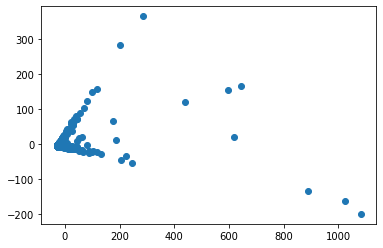

In [135]:
plt.scatter(X_transformed[:,0],X_transformed[:,1])